<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

In [2]:

from ase import Atoms
from ase.io import Trajectory, write
from ase.build import bulk, surface, molecule, add_adsorbate, fcc111
from ase.constraints import ExpCellFilter, StrainFilter, FixAtoms, FixedPlane, FixBondLength
from ase.optimize import LBFGS, BFGS, FIRE
from ase.neb import NEB
from ase.vibrations import Vibrations
from ase.thermochemistry import IdealGasThermo
from ase.visualize import view
from ase.build.rotate import minimize_rotation_and_translation
from ase.md import MDLogger
from ase.io.vasp import read_vasp

import pandas as pd
import ipywidgets as widgets
from IPython.display import display_png, Image as ImageWidget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import shutil

import glob
from pathlib import Path
from PIL import Image, ImageDraw

from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.io.vasp import Poscar
from pymatgen.core.surface import SlabGenerator
from pymatgen.io.ase import AseAtomsAdaptor


import numpy as np
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import r2_score
import numpy as np


def visual(structure, index, max_size=(100, 100), stretch_y=1.0):
    renderer = write('./temp.pov', structure, rotation='30z,-85x')
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)
    
    # Calculate new size with stretch factor
    new_size = (max_size[0], int(max_size[1] * stretch_y))
    img = img.resize(new_size, Image.LANCZOS)
    display(img)
    # Move files to output directory
    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'
    
    # Ensure destination directory exists
    os.makedirs(destination, exist_ok=True)

    for file in files:
        # Remove the file in the destination directory if it exists
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        shutil.move(file, destination)

In [8]:
# Font and color settings
fss = 12  # Font size for legend
fs = 12  # Font size for ticks
fsl = 24  # Font size for labels
arial_path = '../arial.ttf'  # Replace with the actual path
font_properties_label = fm.FontProperties(fname=arial_path, size=fs)
font_properties_tick = fm.FontProperties(fname=arial_path, size=fss)

def subscript(text):
    subscripts = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    return text.translate(subscripts)
# Data
x_values = ['3.7CA', '5.6CA', '7.3CA']
edge_color = 'black'
bar_width = 1  # Adjust the bar width as needed

ce_weight=140.116
o_weight=15.999 
abogadro_num= 6.02*1E+23
experimental_diameter=[3.7,5.6,7.3]
titles=['2_10per','3_ce3p_30','1_5per']#'2_10per_pt','3_ce3p_30_pt','1_5per_pt',
new_title = ['Ce³⁺ 40%', 'Ce³⁺ 30%', 'Ce³⁺ 20%', 'woPt Ce³⁺ 40%', 'woPt Ce³⁺ 30%', 'woPt Ce³⁺ 20%']
markers=['o','s','^', 'v', 'D', '*']
name='_nei'

colors =['#d46970','#4375a0','#012739']
bulk_threshold=4
randnum=[0,1,2,3,4]
sizes=['3.7CA','5.6CA','7.3CA']

cutoff=35
surf_o_per=  [38.4, 25,19.6]  #[[36.7, 37.7, 38.4], [23.6, 23.7, 25.0], [18.0, 18.7, 19.6]]
model_diameter=[3.85, 5.58, 6.89] #[3.67, 5.88, 7.04]#[3.82,5.85,7.01]
cutoffval=f'cutoff_{cutoff}'
test_title=f'{cutoffval}_gceo2'

<<<<<<<<<<<<<<<<<<<  Ce³⁺ 40%  >>>>>>>>>>>>>>>>>>>


processing: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]


peak value 80 1.826
peak value 20 1.498


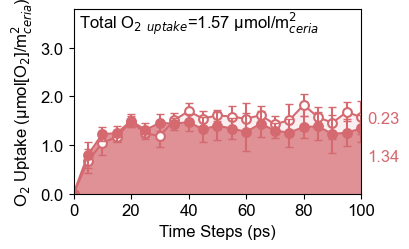

processing: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


peak value 80 2.478
peak value 55 1.686


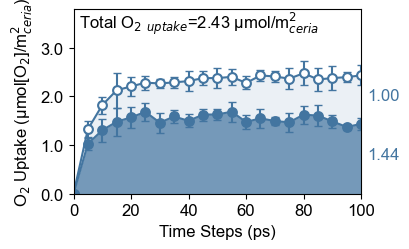

processing: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


peak value 55 3.174
peak value 25 1.74


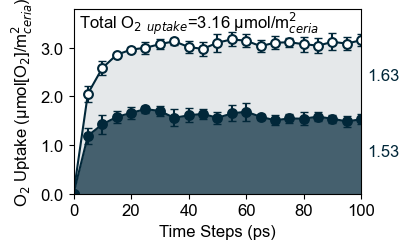

<<<<<<<<<<<<<<<<<<<  Ce³⁺ 30%  >>>>>>>>>>>>>>>>>>>


processing: 100%|██████████| 5/5 [00:00<00:00,  6.97it/s]


peak value 45 1.13
peak value 30 1.126


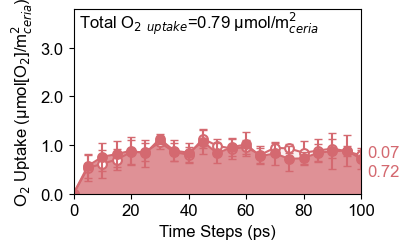

processing: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]


peak value 45 1.8
peak value 20 1.156


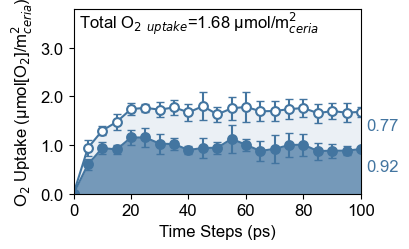

processing: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


peak value 60 2.38
peak value 25 1.392


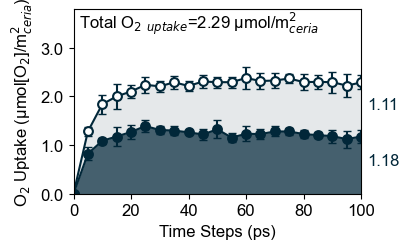

<<<<<<<<<<<<<<<<<<<  Ce³⁺ 20%  >>>>>>>>>>>>>>>>>>>


processing: 100%|██████████| 5/5 [00:00<00:00,  7.60it/s]


peak value 35 0.93
peak value 15 0.714


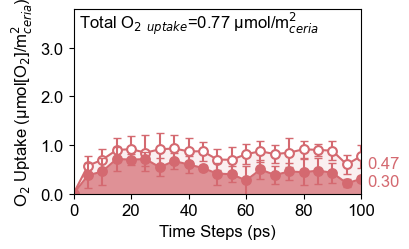

processing: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


peak value 15 1.104
peak value 20 0.948


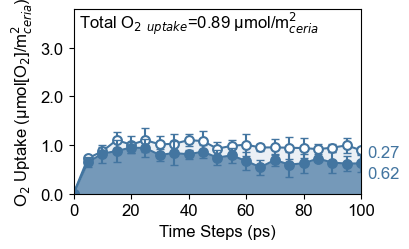

processing: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


peak value 80 1.648
peak value 30 0.95


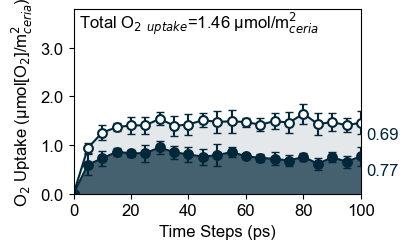

'\nfig, axes = plt.subplots(3, 3, figsize=(14, 9))\nfor j,title in enumerate(new_title[:3]):\n    for i,size in enumerate(sizes):    \n            img_path = f"./c_pngs/{title}_{size}_nei.png"\n            if os.path.exists(img_path):\n                img = mpimg.imread(img_path)\n                axes[i, j].imshow(img)\n                axes[i, j].axis(\'off\')  # Hide axes for better presentation\n            else:\n                print(f"Warning: png not found.")\n\nplt.tight_layout()\nplt.savefig(f\'./timeevolve/{test_title}_nei.png\',dpi=200)\n\nfig, axes = plt.subplots(3, 3, figsize=(14, 9))\nfor j,title in enumerate(new_title[3:]):\n    for i,size in enumerate(sizes):    \n            img_path = f"./c_pngs/{title}_{size}_nei.png"\n            if os.path.exists(img_path):\n                img = mpimg.imread(img_path)\n                axes[i, j].imshow(img)\n                axes[i, j].axis(\'off\')  # Hide axes for better presentation\n            else:\n                print(f"War

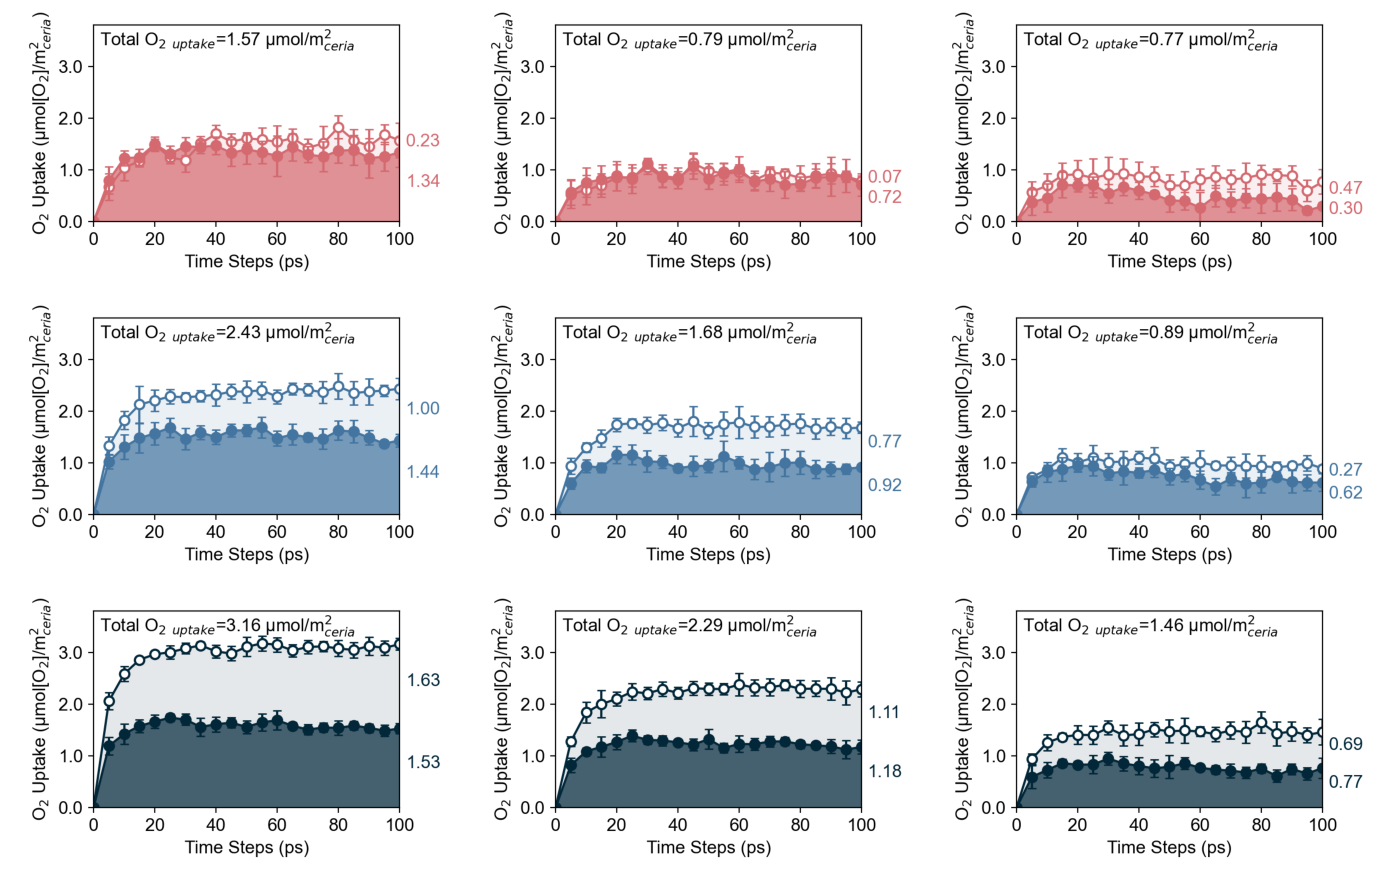

In [9]:
import numpy as np
import pickle
import random
from tqdm import tqdm
from matplotlib.transforms import Affine2D
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

def calculate_mean_nei_num_2(ce_dictionary, bulk_count, surface_count):
    
    tot_count=len(list(ce_dictionary.values()))
    tot_nei_list=list(set([value for entry in list(ce_dictionary.values()) for value in entry['nei_o_index']]))
    bulk_nei_list=list(set([value for entry in list(ce_dictionary.values())[:bulk_count] for value in entry['nei_o_index']]))
    surface_nei_list=list(set([value for entry in list(ce_dictionary.values())[bulk_count:] for value in entry['nei_o_index']]))
    overlapping = list(set(bulk_nei_list) & set(surface_nei_list))
    surface_nei_list = list(set(surface_nei_list) - set(overlapping)) # 계면부근의 O를 bulk 몰아주기
    #print('overlapping',len(overlapping))
    #print(bulk_mean2,surface_mean2)
    bulk_mean = round(np.mean([entry['nei'] for entry in list(ce_dictionary.values())[:bulk_count]]), 2)
    surface_mean = round(np.mean([entry['nei'] for entry in list(ce_dictionary.values())[bulk_count:]]), 2)
    tot_mean = round(np.mean([entry['nei'] for entry in list(ce_dictionary.values())]), 2)
    #print(bulk_mean,surface_mean)
    return bulk_mean, surface_mean,tot_mean


def calculate_abs_nei(ce_dictionary, bulk_count, surface_count):
    tot_count=len(list(ce_dictionary.values()))
    tot_nei_list=list(set([value for entry in list(ce_dictionary.values()) for value in entry['nei_o_index']]))
    bulk_nei_list=list(set([value for entry in list(ce_dictionary.values())[:bulk_count] for value in entry['nei_o_index']]))
    surface_nei_list=list(set([value for entry in list(ce_dictionary.values())[bulk_count:] for value in entry['nei_o_index']]))

    overlapping = list(set(bulk_nei_list) & set(surface_nei_list))
    #1 overlap share half half
    #print('overlap:',len(overlapping)/len(tot_nei_list)*100)
    '''    random.shuffle(overlapping)
        #half = int(len(overlapping)*(bulk_count/(bulk_count+surface_count))) # based on bulk,surf ratio
        half = len(overlapping) // 2
        bulk_half = overlapping[:half]
        surface_half = overlapping[half:]
        bulk_nei_list = list(set(bulk_nei_list) - set(bulk_half))
        surface_nei_list = list(set(surface_nei_list) - set(surface_half))  ''' 
    #2 overlap to bulk
    surface_nei_list = list(set(surface_nei_list) - set(overlapping)) # 계면부근의 O를 bulk 몰아주기
    #3 overlap to surf
    #bulk_nei_list = list(set(bulk_nei_list) - set(overlapping)) # 계면부근의 O를 surf 몰아주기

    
    return [len(tot_nei_list), len(bulk_nei_list),len(surface_nei_list)]

def ssa_converter(diff_list,ce_dictionary,l,size):
    percent=[10,7.5,5,10,7.5,5]
    Ce_num =len(list(ce_dictionary.values()))
    O_num = Ce_num*2 
    modified_O_num = Ce_num*2 *(100-percent[l])
    #diameter=experimental_diameter[size]   ### 
    diameter=model_diameter[size]
    SA_half_sphere = 4 * 3.14 / 2 * (diameter / 2 / 1E+9) ** 2  # Half of sphere
    ceox_in_g = (Ce_num * ce_weight + O_num * o_weight) / abogadro_num  # Ideal Ce1O2
    SSA_SA_sphere = round(SA_half_sphere / ceox_in_g, 2)
    converted_diff_list=[]
    for diff in diff_list:
        o2_uptake_in_micro_mol = diff * 1E+6 / abogadro_num
        o2_uptake_per_ssa_hemi = np.round(o2_uptake_in_micro_mol / ceox_in_g / SSA_SA_sphere, 2)
        o2_uptake_per_gceo2 = np.round(o2_uptake_in_micro_mol / ceox_in_g, 2)


        converted_diff_list.append(o2_uptake_per_ssa_hemi)###############################
        #converted_diff_list.append(o2_uptake_per_gceo2)
    #print(round(SSA_SA_sphere,2))
    #print(round(ceox_in_g,2))
    #print(round(SA_half_sphere,2))
    return converted_diff_list[0],converted_diff_list[1],converted_diff_list[2]

def calculate_o2_uptake(ce_dictionary, bulk_count, surface_count,ini,l,size):
    
    step_nei_abs= calculate_abs_nei(ce_dictionary, bulk_count, surface_count)
    diff_list=[]
    for i,nei_abs in enumerate(step_nei_abs):
        diff=nei_abs-ini[i]
        diff_list.append(diff)
    #print(diff_list)############## 계면부근 산소의 위치에따라 value가 크게 달라져서 여기서 테스트해야함.
    tot_uptake, bulk_uptake, surface_uptake = ssa_converter(diff_list,ce_dictionary,l,size)
    
    return tot_uptake, bulk_uptake, surface_uptake

def avg_std(lists):
    real_list=lists
    stacked_lists = np.stack(real_list, axis=0)
    avg = np.round(np.mean(stacked_lists, axis=0),3)
    std = np.round(np.std(stacked_lists, axis=0),3)
    return [avg, std]



def plot_mean_nei_num(avg_std_list, size, title, sizenum):
    xlabel = "Time Steps (ps)"
    ylabel = 'Average Ce-O coord.'
    time_steps = np.arange(len(avg_std_list[0][0])) * 5

    fig, ax1 = plt.subplots(figsize=(4.2, 2.6))
    labels = ['Bulk', 'Surface']
    for i, avg_std in enumerate(avg_std_list):
        avg, std = avg_std[0], avg_std[1]
        ax1.plot(time_steps, avg, label=labels[i], color=colors[sizenum], linewidth=2, alpha=0.5+0.5*i)
        ax1.scatter(time_steps, avg, color=colors[sizenum], s=40, marker='o', alpha=0.5+0.5*i)
        ax1.errorbar(time_steps, avg, yerr=std, fmt='o', color=colors[sizenum], capsize=3, markersize=0, alpha=0.5+0.5*i)
        arrowprops = dict(facecolor=colors[sizenum], edgecolor=colors[sizenum], shrink=0.05, width=0.1, headwidth=0,alpha=0.5)
        ax1.annotate(f'{avg[0]:.1f}', 
                     xy=(time_steps[0], avg[0]), 
                     xytext=(time_steps[0] + 10, avg[0] -0.3+0.3*i),
                     arrowprops=arrowprops, fontproperties=font_properties_tick, color=colors[sizenum])
        ax1.annotate(f'{avg[-1]:.1f}', 
                     xy=(time_steps[-1], avg[-1]), 
                     xytext=(time_steps[-1] -20, avg[-1]-0.3+0.6*i),
                     arrowprops=arrowprops, fontproperties=font_properties_tick, color=colors[sizenum])

    # Define ticks that span the entire range evenly
    ax1.set_yticks(np.round(np.arange(6, 8.1, 0.5), 2))
    ax1.set_yticklabels(ax1.get_yticks(), fontproperties=font_properties_tick)
    plt.xlabel(xlabel, fontproperties=font_properties_label)
    plt.xticks(fontproperties=font_properties_tick)
    plt.ylabel(ylabel, fontproperties=font_properties_label)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0.05)  # Adjust space between plots
    plt.savefig(f'./c_pngs/{title}_{size}_nei.png', dpi=200)
    plt.show()
    
def plot_o2_uptake(avg_std_list,size,title,sizenum):
    xlabel="Time Steps (ps)"
    ylabel = 'O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)'###############################
    #ylabel = 'O$_{2}$ Uptake (μmol[O$_{2}$]/g$_{ceria}$)'
    time_steps = np.arange(len(bulk_list)) * 5
    plt.figure(figsize=(4.2, 2.6))
    labels=['Total','Bulk','Surface']
    otransfer_pos=avg_std_list[2][0][-1]/2
    oact_pos=(avg_std_list[0][0][-1]+avg_std_list[2][0][-1])/2
    facecolors=['white','white',colors[sizenum]]
    for i,avg_std in enumerate(avg_std_list):
        if i == 0:
            pos=oact_pos
            val=avg_std_list[0][0][-1]-avg_std_list[2][0][-1]
        elif i ==2:
            pos=otransfer_pos
            val=avg_std_list[2][0][-1]
        if not i ==1:
            avg, std =avg_std[0], avg_std[1]
            plt.plot(time_steps, avg, label=labels[i], color=colors[sizenum], linewidth=1.5)
            plt.errorbar(time_steps, avg, yerr=std, fmt='o', label=labels[i], color=colors[sizenum], capsize=3, alpha=1, markersize=0)
            plt.text(time_steps[-1] + 2, pos, f"{val:.2f}", color=colors[sizenum], fontproperties=font_properties_tick)
            plt.fill_between(time_steps, 0, avg, color=colors[sizenum], alpha=0.1+0.3*i,linewidth=0)
            plt.scatter(time_steps, avg, label=labels[i], color=colors[sizenum],facecolor=facecolors[i],s=40,marker='o', linewidth=1.5,zorder=2)
            print("peak value",time_steps[np.argmax(avg)],np.max(avg))

    plt.text(2, 3.4, f'Total O$_{{2}}$ $_{{uptake}}$={round(avg_std_list[0][0][-1],2)}' + ' μmol/m$^{2}_{ceria}$', color='black', fontproperties=font_properties_tick)

    ratio_o2act=int(avg_std_list[2][0][-1]/avg_std_list[0][0][-1]*100)
    ratio_otrans=100-ratio_o2act
    #plt.text(3, 550, f'Total O$_{{2}}$ $_{{uptake}}$={round(avg_std_list[0][0][-1],2)}' + ' μmol/g$_{ceria}$', color='black')###############################
    #plt.ylim(0,600)###############################
    plt.xlim(0,100)
    #plt.ylim(0,3)
    plt.ylim(0,3.8)
    y_ticks = np.arange(0, int(plt.ylim()[1]) + 1, 1)  # Adjust step size if needed 
    #y_ticks = np.arange(0, int(plt.ylim()[1]) + 100, 100)  # Adjust step size if needed 

    plt.yticks(y_ticks, [f"{y:.1f}" for y in y_ticks], fontproperties=font_properties_tick)
    plt.xticks(fontproperties=font_properties_tick)
    plt.xlabel(xlabel, fontproperties=font_properties_label)
    plt.ylabel(ylabel, fontproperties=font_properties_label)  # Add multialignment for line break
    #plt.ylabel('')
    plt.tight_layout()
    plt.savefig(f'./c_pngs/{title}_wo_{size}.png',dpi=200)
    plt.show()

    

final_info_dict={}
for l,title in enumerate(titles):
    #pkl_file_name=f'../2_notebooks/new_json_generators/b_nei/{title}_nei.pkl'
    pkl_file_name=f'./nei/{title}_nei_{cutoff}.pkl'
    with open(pkl_file_name, 'rb') as f: #    with open(f'./{title}_nei_3.2.pkl', 'rb') as f:
        Ce_dictionary_traj_list_list = pickle.load(f)
    print(f'<<<<<<<<<<<<<<<<<<<  {new_title[l]}  >>>>>>>>>>>>>>>>>>>')
    avg_std_list_list=[]
    temp_dict={}
    for j,size in enumerate(sizes):
        randnum=[0,1,2,3,4]
        ce_initial_step = Ce_dictionary_traj_list_list[0][j][0]
        bulk_count,  surface_count = int(len(ce_initial_step)/100*(100-surf_o_per[j]))+1,int(len(ce_initial_step)/100*surf_o_per[j])
        bulk_list_list,surf_list_list,tot_list_list=[],[],[]
        o2up_tot_list_list,o2up_bulk_list_list,o2up_surf_list_list=[],[],[]
        for rand in tqdm(randnum,desc='processing'):
            initial=Ce_dictionary_traj_list_list[rand][j][0]
            initial_tot_values=calculate_abs_nei(initial, bulk_count, surface_count)
            bulk_list = [calculate_mean_nei_num_2(step, bulk_count, surface_count)[0] for step in Ce_dictionary_traj_list_list[rand][j]]
            surf_list = [calculate_mean_nei_num_2(step, bulk_count, surface_count)[1] for step in Ce_dictionary_traj_list_list[rand][j]]
            tot_list = [calculate_mean_nei_num_2(step, bulk_count, surface_count)[2] for step in Ce_dictionary_traj_list_list[rand][j]]

            bulk_list_list.append(bulk_list)
            surf_list_list.append(surf_list)
            tot_list_list.append(tot_list)

            o2up_tot_list =[calculate_o2_uptake(step, bulk_count, surface_count,initial_tot_values,l,j)[0] for step in Ce_dictionary_traj_list_list[rand][j]]
            o2up_bulk_list=[calculate_o2_uptake(step, bulk_count, surface_count,initial_tot_values,l,j)[1] for step in Ce_dictionary_traj_list_list[rand][j]]
            o2up_surf_list=[calculate_o2_uptake(step, bulk_count, surface_count,initial_tot_values,l,j)[2] for step in Ce_dictionary_traj_list_list[rand][j]]
            o2up_tot_list_list.append(o2up_tot_list)
            o2up_bulk_list_list.append(o2up_bulk_list)
            o2up_surf_list_list.append(o2up_surf_list)
        avg_std_list=[avg_std(bulk_list_list),avg_std(surf_list_list)]
        avg_std_tot=avg_std(tot_list_list)
        #print(f'{title}_{size}nm',avg_std_tot[0][0],avg_std_tot[1][0],avg_std_tot[0][-1],avg_std_tot[1][-1])
        uptake_avg_std_list=[avg_std(o2up_tot_list_list),avg_std(o2up_bulk_list_list),avg_std(o2up_surf_list_list)]
        temp_dict[size]={'tot_avg':uptake_avg_std_list[0][0][-1],'tot_std':uptake_avg_std_list[0][1][-1],
                         'bulk_avg':uptake_avg_std_list[1][0][-1],'bulk_std':uptake_avg_std_list[1][1][-1],
                         'surf_avg':uptake_avg_std_list[2][0][-1],'surf_std':uptake_avg_std_list[2][1][-1]
                        }
        
        #plot_o2_uptake_clean(uptake_avg_std_list,size,new_title[l],j)
        plot_o2_uptake(uptake_avg_std_list,size,new_title[l],j)
        #plot_mean_nei_num(avg_std_list,size,new_title[l],j)
        avg_std_list_list.append(uptake_avg_std_list)
    final_info_dict[title]=temp_dict


fig, axes = plt.subplots(3, 3, figsize=(14, 9))
for j,title in enumerate(new_title[:3]):
    for i,size in enumerate(sizes):    
            img_path = f"./c_pngs/{title}_wo_{size}.png"
            if os.path.exists(img_path):
                img = mpimg.imread(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')  # Hide axes for better presentation
            else:
                print(f"Warning: png not found.")

plt.tight_layout()
plt.savefig(f'./timeevolve/{test_title}_wo.png',dpi=200)


'''
fig, axes = plt.subplots(3, 3, figsize=(14, 9))
for j,title in enumerate(new_title[:3]):
    for i,size in enumerate(sizes):    
            img_path = f"./c_pngs/{title}_{size}_nei.png"
            if os.path.exists(img_path):
                img = mpimg.imread(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')  # Hide axes for better presentation
            else:
                print(f"Warning: png not found.")

plt.tight_layout()
plt.savefig(f'./timeevolve/{test_title}_nei.png',dpi=200)

fig, axes = plt.subplots(3, 3, figsize=(14, 9))
for j,title in enumerate(new_title[3:]):
    for i,size in enumerate(sizes):    
            img_path = f"./c_pngs/{title}_{size}_nei.png"
            if os.path.exists(img_path):
                img = mpimg.imread(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')  # Hide axes for better presentation
            else:
                print(f"Warning: png not found.")

plt.tight_layout()
plt.savefig(f'./timeevolve/{test_title}_wopt_nei.png',dpi=200)
'''

In [184]:
g_data_wo_dict=final_info_dict

In [192]:
m2_data_wo_dict=final_info_dict

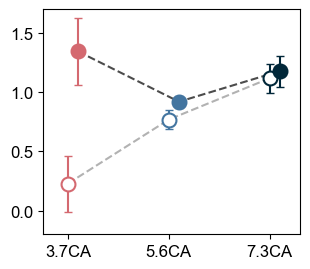

In [200]:
plt.figure(figsize=(3.2,2.8))

re_titles=['1_5per','3_ce3p_30','2_10per']
#re_titles=['1_5per_pt','3_ce3p_30_pt','2_10per_pt']


title = re_titles[2]
data=m2_data_dict[title]
size='3.7CA'
bulk_avg,bulk_std,surf_avg,surf_std=[],[],[],[]
bulk_avg.append(data[size]['bulk_avg'])
bulk_std.append(data[size]['bulk_std'])
surf_avg.append(data[size]['surf_avg'])
surf_std.append(data[size]['surf_std'])

title = re_titles[1]
data=m2_data_dict[title]
for size in ['5.6CA','7.3CA']:
    bulk_avg.append(data[size]['bulk_avg'])
    bulk_std.append(data[size]['bulk_std'])
    surf_avg.append(data[size]['surf_avg'])
    surf_std.append(data[size]['surf_std'])

colors_o_character=['black','black']
sizes_numeric = np.arange(len(sizes))
alpha=1
span=+0.1
plt.plot(sizes_numeric, bulk_avg, color=colors_o_character[1], linestyle='--', linewidth=1.5,alpha=0.3)
plt.plot(sizes_numeric + span, surf_avg, color=colors_o_character[0], linestyle='--', linewidth=1.5,alpha=0.7)
#plt.errorbar(sizes_numeric, tot_avg, yerr=tot_std, fmt='o', label='Total Avg', capsize=5)
for i, (bulk,surf) in enumerate(zip(bulk_avg,surf_avg)):
    plt.errorbar(sizes_numeric[i], bulk, yerr=bulk_std[i], fmt='s', color=colors[i], capsize=3, markersize=0, alpha=alpha, linewidth=1.5)
    plt.errorbar(sizes_numeric[i]+span, surf, yerr=surf_std[i], fmt='^', color=colors[i], capsize=3, markersize=0, linewidth=1.5)
    plt.scatter(sizes_numeric[i], bulk, label=f'{title} Bulk', color=colors[i], facecolor='white', s=100, marker='o', zorder=2, edgecolor=colors[i], linewidth=1.5)
    plt.scatter(sizes_numeric[i]+span, surf, label=f'{title} Bulk', color=colors[i], s=100, marker='o', zorder=2, edgecolor=colors[i], linewidth=1.5)


ylabel = 'O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)'

plt.xticks(sizes_numeric, sizes)
plt.xlim(-0.25, len(sizes) - 0.7)
plt.ylim(-0.2, 1.7)
plt.scatter([], [], color='black', alpha=0.7, marker='^', label=f'O$_{{2}}$ $_{{activation}}$', s=100)
plt.scatter([], [], color='gray', alpha=0.7, marker='s', label=f'O$_{{transfer}}$', s=100)
#plt.legend(loc='lower right')

plt.yticks(np.arange(0, plt.ylim()[1] + 0.3, 0.5), [f"{y:.1f}" for y in np.arange(0, plt.ylim()[1] + 0.3, 0.5)], fontproperties=font_properties_tick)
plt.xticks(fontproperties=font_properties_tick)
#plt.ylabel(ylabel, fontproperties=font_properties_label) 
plt.tight_layout()
plt.savefig(f'./e_total/1_o2_uptake_by_size.png',dpi=200)
plt.show()


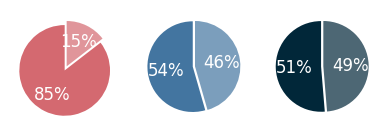

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


def apply_alpha(color, alpha):
    rgba = mcolors.to_rgba(color)
    return rgba[:3] + (alpha,)
def pct_format(pct):
    return f'{int(round(pct,0))}%'
plt.figure(figsize=(4, 5))

explode_list = [(0.1, 0) ,(0.05, 0), (0.05, 0) ]

for i, size in enumerate(sizes):
    ax = plt.subplot(2, 3, i + 4)  # subplots for pie charts
    overall_ratios = [surf_avg[i], bulk_avg[i]]
    color=colors[i]
    colors_made = [color, apply_alpha(color, 0.7)]
    ax.pie(overall_ratios, autopct=pct_format, startangle=90, colors=colors_made, explode=explode_list[i],
           textprops={'color': 'white', 'fontsize': 12})  # Set text color to white and font size smaller
plt.tight_layout()
plt.savefig(f'./e_total/1_o2_uptake_and_pie_charts.png', dpi=200)
plt.show()


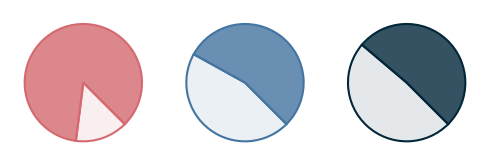

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def apply_alpha(color, alpha):
    rgba = mcolors.to_rgba(color)
    return rgba[:3] + (alpha,)

def pct_format(pct):
    return f'{int(round(pct, 0))}%'

plt.figure(figsize=(5, 6))

#explode_list = [(0.1, 0), (0.03, 0), (0.03, 0)]
explode_list = [(0, 0), (0.0, 0), (0.0, 0)]

for i, size in enumerate(sizes):
    ax = plt.subplot(2, 3, i + 4)  # subplots for pie charts
    overall_ratios = [surf_avg[i], bulk_avg[i]]
    color = colors[i]
    colors_made = [apply_alpha(color, 0.8), apply_alpha(color, 0.1)]
    
    wedges, texts, autotexts = ax.pie(overall_ratios, autopct='', startangle=315, colors=colors_made, explode=explode_list[i])
    
    for j,wedge in enumerate(wedges):
        wedge.set_edgecolor(colors[i])
        wedge.set_linewidth(1.5)

plt.tight_layout()
plt.savefig(f'./e_total/1_o2_uptake_and_pie_charts_2.png', dpi=200)
plt.show()


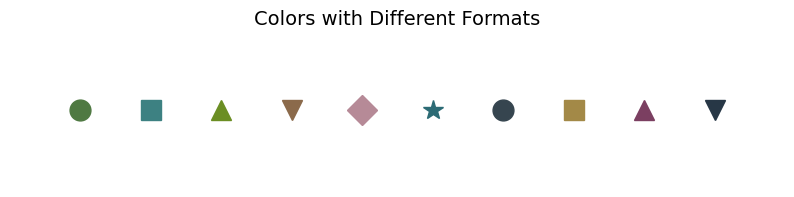

In [189]:
import matplotlib.pyplot as plt

# Define the new set of colors and their respective formats
colors_and_formats = [
    ('#4F7942', 'o'),  # Muted Green with circle
    ('#3D8182', 's'),  # Teal with square
    ('#6B8E23', '^'),  # Dark Olive with triangle up
    ('#8B6A4B', 'v'),  # Warm Taupe with triangle down
    ('#B68A97', 'D'),  # Dusty Rose with diamond
    ('#2C6B75', '*'),  # Deep Cyan with star
    ('#36454F', 'o'),  # Charcoal Gray with circle
    ('#A38947', 's'),  # Muted Mustard with square
    ('#7B3F61', '^'),  # Burgundy with triangle up
    ('#273746', 'v')   # Navy Blue with triangle down
]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 2))

# Plot each color with its corresponding format
for idx, (color, fmt) in enumerate(colors_and_formats):
    ax.plot(idx, 1, fmt, color=color, markersize=15, label=f'{color}')

# Set title and layout
ax.set_title('Colors with Different Formats', fontsize=14)
ax.set_xlim(-1, len(colors_and_formats))
ax.set_ylim(0.5, 1.5)
ax.set_xticks(range(len(colors_and_formats)))
ax.set_xticklabels([f'{color}' for color, fmt in colors_and_formats], rotation=90, fontsize=10)
ax.set_yticks([])

# Hide axes
ax.axis('off')

# Display the plot
plt.show()


Total Uptake

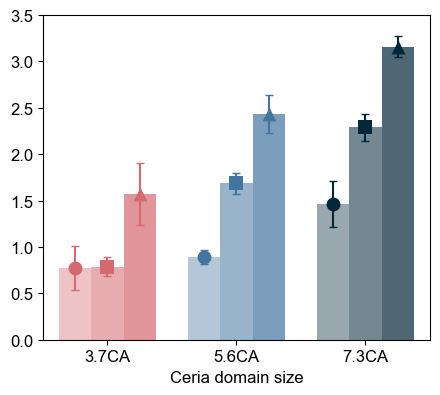

In [190]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4.5, 4))
fmts = ['o','s', '^', 'D', '*']
percent=[20,30,40]
re_titles=['1_5per','3_ce3p_30','2_10per']
#re_titles=['1_5per_pt','3_ce3p_30_pt','2_10per_pt']



for l, title in enumerate(re_titles):
    data = m2_data_dict[title]
    sizes = list(data.keys())
    tot_avg = [data[size]['tot_avg'] for size in sizes]
    tot_std = [data[size]['tot_std'] for size in sizes]
    
    # Convert sizes to numeric values for plotting
    sizes_numeric = np.arange(len(sizes))

    bar_width = 0.25
    for j,(avg,std) in enumerate(zip(tot_avg,tot_std)):
        x = sizes_numeric[j] + l * bar_width
        plt.bar(x, avg, bar_width, yerr=std,facecolor=colors[j], ecolor=colors[j], capsize=3, alpha=0.4+0.15*l)
        plt.scatter(x, avg,color=colors[j],s=100,marker=fmts[l],edgecolor=colors[j], linewidth=0,zorder=2)

# Customize the plot
plt.xticks(sizes_numeric + bar_width, sizes)
xlabel = "Ceria domain size"
ylabel = 'O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)'

for l, title in enumerate(re_titles):
    plt.scatter([], [], color='gray', marker=fmts[l], label=f'Ce$^{{3+}}$/Ce$^{{4+}}$ {percent[l]}%', s=100)#, alpha=0.25+0.25*l)

#plt.legend(loc='upper left')
plt.yticks(fontproperties=font_properties_tick)
plt.xticks(fontproperties=font_properties_tick)
plt.xlabel(xlabel, fontproperties=font_properties_label)
plt.ylabel('')#ylabel, fontproperties=font_properties_label) 
plt.tight_layout()
plt.xlim(-0.25, len(sizes) - 0.75 + 2 * bar_width)
plt.ylim(0, 3.5)
plt.savefig(f'./e_total/sizevs_reduction.png',dpi=200)

# Show the plot
plt.show()


In [181]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4.2, 3.6))
fmts = ['o','s','^', 'v', 'D', '*']
percent=[20,30,40]
re_titles=['1_5per','3_ce3p_30','2_10per']
#re_titles=['1_5per_pt','3_ce3p_30_pt','2_10per_pt']

for l, title in enumerate(re_titles):
    data = m2_data_dict[title]
    sizes = list(data.keys())
    tot_avg = [data[size]['tot_avg'] for size in sizes]
    tot_std = [data[size]['tot_std'] for size in sizes]
    
    # Convert sizes to numeric values for plotting
    sizes_numeric = np.arange(len(sizes))

    bar_width = 0.25
    for j,(avg,std) in enumerate(zip(tot_avg,tot_std)):
        x = sizes_numeric[l] + j * bar_width
        plt.bar(x, avg, bar_width, yerr=std ,color=colors[j], ecolor=colors[j], capsize=3,alpha=0.2+0.4*l)
        plt.scatter(x, avg,  s=90,color=colors[j],edgecolor='white')

# Customize the plot
oxis=[f'{per}%' for per in percent]
plt.xticks(sizes_numeric + bar_width, oxis)
xlabel = f'Ce$^{{3+}}$/Ce$^{{4+}}$ ratio'
ylabel = 'O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)'

for l, title in enumerate(re_titles):
    plt.scatter([], [], color='gray',  marker='s', label=f'Ce$^{{3+}}$ {percent[l]}%', s=100, alpha=0.2+0.4*l)
plt.legend(loc='upper left')

plt.yticks(fontproperties=font_properties_tick)
plt.xticks(fontproperties=font_properties_tick)
plt.xlabel(xlabel, fontproperties=font_properties_label)
plt.ylabel(ylabel, fontproperties=font_properties_label) 
plt.tight_layout()
plt.xlim(-0.25, len(sizes) - 0.75 + 2 * bar_width)
plt.ylim(0,3.3)
plt.savefig(f'./e_total/sizevs_reduction_by_per.png',dpi=200)

# Show the plot
plt.show()


KeyError: '1_5per_pt'

<Figure size 420x360 with 0 Axes>

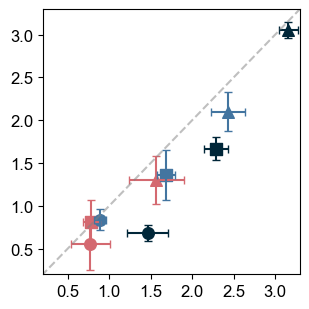

In [204]:
import matplotlib.pyplot as plt
import numpy as np


#group1_titles = ['2_10per_pt', '3_ce3p_30_pt', '1_5per_pt']
group2_titles = ['2_10per', '3_ce3p_30', '1_5per']
group1_titles = ['2_10per', '3_ce3p_30', '1_5per']

# Define markers for specific title patterns
marker_map = {
    '1_5per': 'o',  
    '3_ce3p_30': 's',    
    '2_10per': '^'  
}

# Extract data
group1_avgs = []
group2_avgs = []
group1_stds = []
group2_stds = []
markers_list = []
colors_list = []

sizes = ['3.7CA', '5.6CA', '7.3CA']

# Function to get marker based on title
def get_marker(title):
    for key in marker_map:
        if key in title:
            return marker_map[key]
    return 'd'  # Default marker (diamond) if no match found

# Loop through the data
for j, size in enumerate(sizes):
    for title1, title2 in zip(group1_titles, group2_titles):
        if size in m2_data_dict[title1] and size in m2_data_wo_dict[title2]:
            group1_avg = m2_data_dict[title1][size]['tot_avg']
            group2_avg = m2_data_wo_dict[title2][size]['tot_avg']
            group1_std = m2_data_dict[title1][size]['tot_std']
            group2_std = m2_data_wo_dict[title2][size]['tot_std']
            group1_avgs.append(group1_avg)
            group2_avgs.append(group2_avg)
            group1_stds.append(group1_std)
            group2_stds.append(group2_std)
            markers_list.append(get_marker(title1))  # Use the function to get marker
            colors_list.append(colors[j])  # Use the color based on size index

            
# Plotting
plt.figure(figsize=(3.2, 3.2))

# Plot each point with its respective marker and error bars
for i, (g1, g2, g1_err, g2_err, marker, color) in enumerate(zip(group1_avgs, group2_avgs, group1_stds, group2_stds, markers_list, colors_list)):
    index = i % 3  # This will give you 0, 1, 2 as i cycles through
    plt.errorbar(g1, g2, xerr=g1_err, yerr=g2_err, fmt=marker_map[group1_titles[index]], color=color, ecolor=color, markersize=0, capsize=3)
    plt.scatter(g1, g2,   marker=marker_map[group1_titles[index]],  s=70, color=color)

# Add parity line
max_value = max(max(group1_avgs), max(group2_avgs))
plt.plot([0, 3.5], [0, 3.5], linestyle='--', color='gray', label='Parity Line',alpha=0.5)

# Customize the plot
#plt.xlabel('O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
#plt.ylabel('woPt O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')


'''
for l,(title_key, marker) in enumerate(marker_map.items()):
    for color, size in zip(colors, sizes):
        plt.scatter([], [], color=color, marker=marker, label=f'Ce$^{{3+}}${percent[l]}% {size}', s=50)    
    '''


y_ticks = np.arange(0, round(plt.ylim()[1],1) + 0.5, 0.5)  # Adjust step size if needed
plt.yticks(y_ticks, [f"{y:.1f}" for y in y_ticks], fontproperties=font_properties_tick)
plt.xticks(y_ticks, [f"{y:.1f}" for y in y_ticks], fontproperties=font_properties_tick)

plt.xlim(0.2,3.3)
plt.ylim(0.2,3.3)
plt.tight_layout()
plt.savefig(f'./e_total/ptvswopt_tot_perm2.png',dpi=200)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming titlesdict is your data dictionary
titlesdict = m2_data_dict

group1_titles = ['2_10per_pt', '3_ce3p_30_pt', '1_5per_pt']
group2_titles = ['2_10per', '3_ce3p_30', '1_5per']

# Define markers for specific title patterns
marker_map = {
    '5per': '^',  # Triangle up
    '30': 'o',    # Circle
    '10per': 's'  # Square
}



# Extract data
surf_group1_avgs = []
surf_group2_avgs = []
surf_group1_stds = []
surf_group2_stds = []

bulk_group1_avgs = []
bulk_group2_avgs = []
bulk_group1_stds = []
bulk_group2_stds = []

markers_list = []
colors_list = []

sizes = ['3.7CA', '5.6CA', '7.3CA']

# Function to get marker based on title
def get_marker(title):
    for key in marker_map:
        if key in title:
            return marker_map[key]
    return 'd'  # Default marker (diamond) if no match found

# Loop through the data
for j, size in enumerate(sizes):
    for title1, title2 in zip(group1_titles, group2_titles):
        if size in titlesdict[title1] and size in titlesdict[title2]:
            surf_group1_avg = titlesdict[title1][size]['surf_avg']
            surf_group2_avg = titlesdict[title2][size]['surf_avg']
            surf_group1_std = titlesdict[title1][size]['surf_std']
            surf_group2_std = titlesdict[title2][size]['surf_std']
            
            bulk_group1_avg = titlesdict[title1][size]['bulk_avg']
            bulk_group2_avg = titlesdict[title2][size]['bulk_avg']
            bulk_group1_std = titlesdict[title1][size]['bulk_std']
            bulk_group2_std = titlesdict[title2][size]['bulk_std']
            
            surf_group1_avgs.append(surf_group1_avg)
            surf_group2_avgs.append(surf_group2_avg)
            surf_group1_stds.append(surf_group1_std)
            surf_group2_stds.append(surf_group2_std)
            
            bulk_group1_avgs.append(bulk_group1_avg)
            bulk_group2_avgs.append(bulk_group2_avg)
            bulk_group1_stds.append(bulk_group1_std)
            bulk_group2_stds.append(bulk_group2_std)
            
            markers_list.append(get_marker(title1))
            colors_list.append(colors[j])  # Use the color based on size index

# Plotting for surf_avg
plt.figure(figsize=(6, 6))
for i, (g1, g2, g1_err, g2_err, marker, color) in enumerate(zip(surf_group1_avgs, surf_group2_avgs, surf_group1_stds, surf_group2_stds, markers_list, colors_list)):
    plt.errorbar(g1, g2, xerr=g1_err, yerr=g2_err, fmt=marker, color=color, ecolor=color, alpha=0.5, markersize=10, capsize=3 )
    plt.scatter(g1, g2, marker=marker, color=color,edgecolor=color, s=100,lw=2)


plt.plot([-0.25,2], [-0.25,2], linestyle='--', color='gray', label='Parity Line', alpha=0.5)

plt.xlabel('O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
plt.ylabel('woPt O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
# Add legend for markers
for i, (title_key, marker) in enumerate(marker_map.items()):
    plt.scatter([], [], color='gray', alpha=0.7, marker=marker, label=f'Ce$^{{3+}}$ {percent[i]}%', s=100)
plt.xlim(-0.25,2)
plt.ylim(-0.25,2)
plt.legend(loc='upper left')
plt.savefig('./e_total/ptvswopt_surf.png', dpi=200)
plt.show()

# Plotting for bulk_avg
plt.figure(figsize=(6, 6))
for i, (g1, g2, g1_err, g2_err, marker, color) in enumerate(zip(bulk_group1_avgs, bulk_group2_avgs, bulk_group1_stds, bulk_group2_stds, markers_list, colors_list)):
    plt.errorbar(g1, g2, xerr=g1_err, yerr=g2_err, fmt=marker, color='white', ecolor=color, alpha=0.5, markersize=0, capsize=3,zorder=1)
    plt.scatter(g1, g2, marker=marker, color='white',edgecolor=color, s=100,lw=2,zorder=2)

plt.plot([-0.25,2], [-0.25,2], linestyle='--', color='gray', label='Parity Line', alpha=0.5)

plt.xlabel('O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
plt.ylabel('woPt O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')

# Add legend for markers
for i, (title_key, marker) in enumerate(marker_map.items()):
    plt.scatter([], [], color='gray', alpha=0.7, marker=marker, label=f'Ce$^{{3+}}$ {percent[i]}%', s=100)
plt.xlim(-0.25,2)
plt.ylim(-0.25,2)
plt.legend(loc='upper left')
plt.savefig('./e_total/ptvswopt_bulk.png', dpi=200)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming titlesdict is your data dictionary
titlesdict = m2_data_dict

group1_titles = ['2_10per_pt', '3_ce3p_30_pt', '1_5per_pt']
group2_titles = ['2_10per', '3_ce3p_30', '1_5per']

# Define markers for specific title patterns
marker_map = {
    '5per': '^',  # Triangle up
    '30': 'o',    # Circle
    '10per': 's'  # Square
}


# Extract data
surf_group1_avgs = []
surf_group2_avgs = []
surf_group1_stds = []
surf_group2_stds = []

bulk_group1_avgs = []
bulk_group2_avgs = []
bulk_group1_stds = []
bulk_group2_stds = []

markers_list = []
colors_list = []

sizes = ['3.7CA', '5.6CA', '7.3CA']

# Function to get marker based on title
def get_marker(title):
    for key in marker_map:
        if key in title:
            return marker_map[key]
    return 'd'  # Default marker (diamond) if no match found

# Loop through the data
for j, size in enumerate(sizes):
    for title1, title2 in zip(group1_titles, group2_titles):
        if size in titlesdict[title1] and size in titlesdict[title2]:
            surf_group1_avg = titlesdict[title1][size]['surf_avg']
            surf_group2_avg = titlesdict[title2][size]['surf_avg']
            surf_group1_std = titlesdict[title1][size]['surf_std']
            surf_group2_std = titlesdict[title2][size]['surf_std']
            
            bulk_group1_avg = titlesdict[title1][size]['bulk_avg']
            bulk_group2_avg = titlesdict[title2][size]['bulk_avg']
            bulk_group1_std = titlesdict[title1][size]['bulk_std']
            bulk_group2_std = titlesdict[title2][size]['bulk_std']
            
            surf_group1_avgs.append(surf_group1_avg)
            surf_group2_avgs.append(surf_group2_avg)
            surf_group1_stds.append(surf_group1_std)
            surf_group2_stds.append(surf_group2_std)
            
            bulk_group1_avgs.append(bulk_group1_avg)
            bulk_group2_avgs.append(bulk_group2_avg)
            bulk_group1_stds.append(bulk_group1_std)
            bulk_group2_stds.append(bulk_group2_std)
            
            markers_list.append(get_marker(title1))
            colors_list.append(colors[j])  # Use the color based on size index

# Combined Plotting for surf_avg and bulk_avg
plt.figure(figsize=(6, 6))

# Plot each point for surf_avg
for i, (g1, g2, g1_err, g2_err, marker, color) in enumerate(zip(surf_group1_avgs, surf_group2_avgs, surf_group1_stds, surf_group2_stds, markers_list, colors_list)):
    plt.errorbar(g1, g2, xerr=g1_err, yerr=g2_err, fmt=marker, color=color, ecolor=color, alpha=0.5, markersize=10, capsize=3 )
    plt.scatter(g1, g2, marker=marker, color=color,edgecolor=color, s=100,lw=2)

# Plot each point for bulk_avg with alpha=0.5
for i, (g1, g2, g1_err, g2_err, marker, color) in enumerate(zip(bulk_group1_avgs, bulk_group2_avgs, bulk_group1_stds, bulk_group2_stds, markers_list, colors_list)):
    plt.errorbar(g1, g2, xerr=g1_err, yerr=g2_err, fmt=marker, color='white', ecolor=color, alpha=0.5, markersize=0, capsize=3,zorder=1)
    plt.scatter(g1, g2, marker=marker, color='white',edgecolor=color, s=100,lw=2,zorder=2)

# Add parity line
max_value = max(max(surf_group1_avgs + bulk_group1_avgs), max(surf_group2_avgs + bulk_group2_avgs))
plt.plot([-0.25, 2], [-0.25, 2], linestyle='--', color='gray', label='Parity Line', alpha=0.5)
# Customize the plot
plt.xlabel('O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
plt.ylabel('woPt O$_{2}$ Uptake (μmol[O$_{2}$]/m$^{2}_{ceria}$)')
# Add legend for markers
for i, (title_key, marker) in enumerate(marker_map.items()):
    plt.scatter([], [], color='gray', alpha=0.7, marker=marker, label=f'Ce$^{{3+}}$ {percent[i]}%  O$_{{2}}$ $_{{act}}$', s=100)

for i, (title_key, marker) in enumerate(marker_map.items()):
    plt.scatter([], [], color='white',edgecolor='gray', marker=marker, label=f'Ce$^{{3+}}$ {percent[i]}% O$_{{transfer}}$', s=100)
plt.xlim(-0.25,2)
plt.ylim(-0.25,2)
plt.legend(loc='upper left')
plt.savefig('./e_total/ptvswopt_combined.png', dpi=200)
plt.show()
